In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [11]:
fraud=pd.read_csv("C:\\Users\\prasa\\Downloads\\Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [12]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [13]:
## In the above data there is some categorical data, so we need to convert that into numerical data.

In [14]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Urban', 'Marital.Status'])
fraud1 = encoder.fit_transform(fraud)

In [15]:
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2


In [17]:
status = []
for value in fraud1["Taxable.Income"]:
     if value<=30000:
        status.append("Risky")
     else:
        status.append("Good")

fraud1["status"]= status

In [19]:
fraud1.drop(['Taxable.Income'], axis=1, inplace=True)

In [20]:
fraud1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status
0,1,1,50047,10,1,Good
1,2,2,134075,18,1,Good
2,1,3,160205,30,1,Good
3,2,1,193264,15,1,Good
4,1,3,27533,28,2,Good


In [21]:
x = fraud1.iloc[:,:5]
y = fraud1['status']

In [22]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [23]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: status, Length: 600, dtype: object

In [28]:
y.value_counts()

Good     476
Risky    124
Name: status, dtype: int64

In [35]:
# Now devide the data for training and testing purpose. Here im considering 40% data for testing.
# Random state is a number which we can give any number between 1 to 45. if we dont give random state each time we execute the code the output will vary.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 42)

## Building DecisionTree Using Entropy

In [37]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [38]:
preds = model.predict(x_test)
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

## Plot the DecisionTree

In [39]:
x_test.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

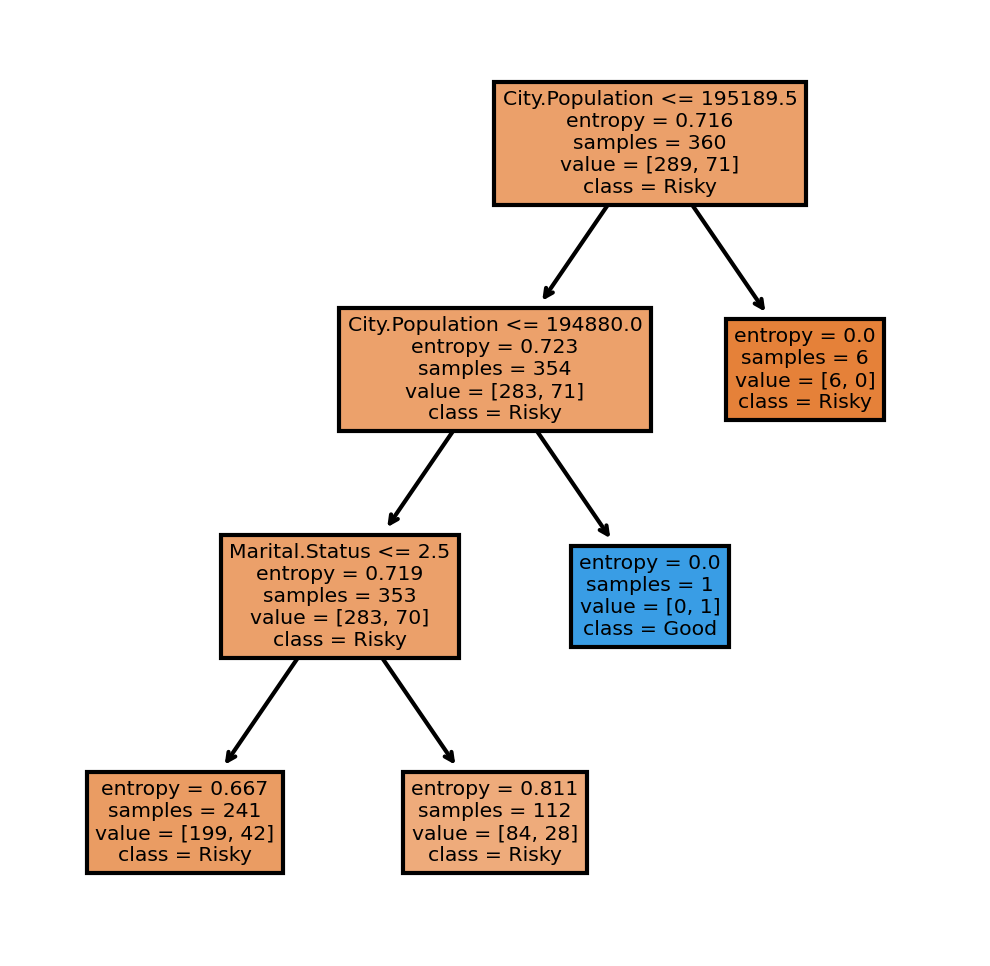

In [40]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True);
plt.savefig('DT_Entropy.pdf')

In [41]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

Good     239
Risky      1
dtype: int64

In [42]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,Good,Risky
status,,
Good,187,0
Risky,52,1


In [43]:
#Accuracy
model.score(x_test, y_test)

0.7833333333333333

## Building Decision Tree Classifier (CART) using Gini Criteria

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=40)

In [49]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

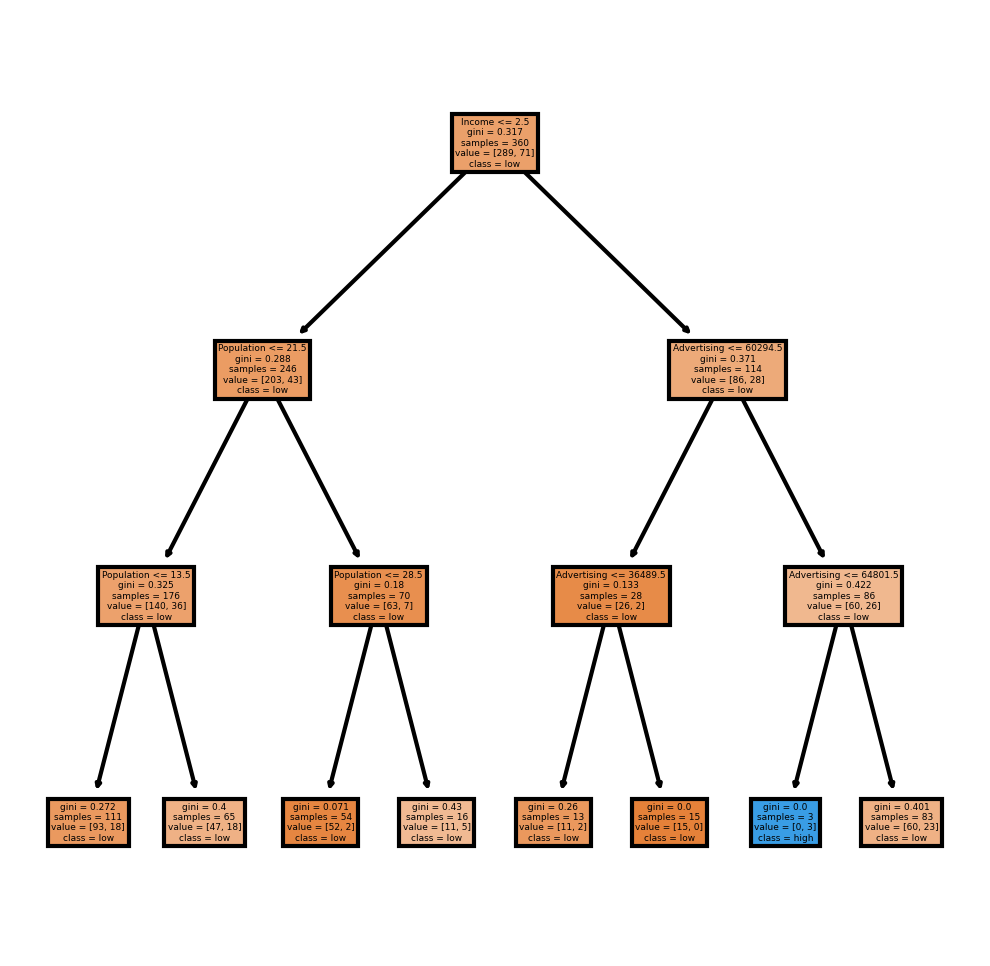

In [50]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['low', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini, feature_names = fn, class_names=cn, filled = True);

In [53]:
#Prediction and computing the accuracy
pred = model_gini.predict(x_test)
model_gini.score(x_train, y_train)

0.8111111111111111

### Using both Entropy method and Gini criteria we got best accucary which is greater than 75%. But usinng gini criteria we got 81%.